In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
csv_data = pd.read_csv('cardata.csv')
intial_df = pd.DataFrame(csv_data)
intial_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
intial_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
working_df = intial_df.copy()
working_df.drop(columns='Car_Name',inplace=True)
working_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
max_year= np.max(working_df['Year'])
working_df.insert(1,column='Age',value = 0)
working_df['Age'] = max_year - working_df['Year']
working_df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,5,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,1,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,7,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,2,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,3,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,9,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,1,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
working_df.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,2.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,4.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,15.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
X = pd.DataFrame(working_df,columns=['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
Y = working_df['Selling_Price'].values.reshape(-1,1)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Fuel_Type', 'Seller_Type', 'Transmission']]), columns=encoder.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission']))
X.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)
X

d:\other\python\IMT\car price estimation\car-price-estimation-\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4,5.59,27000,0,0.0,1.0,0.0,1.0
1,5,9.54,43000,0,1.0,0.0,0.0,1.0
2,1,9.85,6900,0,0.0,1.0,0.0,1.0
3,7,4.15,5200,0,0.0,1.0,0.0,1.0
4,4,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
296,2,11.60,33988,0,1.0,0.0,0.0,1.0
297,3,5.90,60000,0,0.0,1.0,0.0,1.0
298,9,11.00,87934,0,0.0,1.0,0.0,1.0
299,1,12.50,9000,0,1.0,0.0,0.0,1.0


In [8]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.128897,-0.236215,-0.256224,-0.174501,-0.498962,0.509327,-0.737285,0.39148
1,0.217514,0.221505,0.155911,-0.174501,2.004162,-1.963374,-0.737285,0.39148
2,-1.168129,0.257427,-0.773969,-0.174501,-0.498962,0.509327,-0.737285,0.39148
3,0.910335,-0.403079,-0.817758,-0.174501,-0.498962,0.509327,-0.737285,0.39148
4,-0.128897,-0.087890,0.141743,-0.174501,2.004162,-1.963374,-0.737285,0.39148
...,...,...,...,...,...,...,...,...
296,-0.821718,0.460214,-0.076225,-0.174501,2.004162,-1.963374,-0.737285,0.39148
297,-0.475308,-0.200292,0.593804,-0.174501,-0.498962,0.509327,-0.737285,0.39148
298,1.603156,0.390687,1.313340,-0.174501,-0.498962,0.509327,-0.737285,0.39148
299,-1.168129,0.564504,-0.719876,-0.174501,2.004162,-1.963374,-0.737285,0.39148


In [9]:
correlation_df = pd.DataFrame()
columns = list(X_scaled.columns)
for i in range(0,7) :
    for j in range(i+1,8) :
        correlation_factor = np.corrcoef(X_scaled.iloc[:,i],X_scaled.iloc[:,j])
        correlation_df.loc[columns[i],columns[j]] = correlation_factor[0,1]

correlation_df  


,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Present_Price,NaN,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,NaN,NaN,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,NaN,NaN,NaN,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,NaN,NaN,NaN,NaN,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,NaN,NaN,NaN,NaN,NaN,0.358321,0.091013
Seller_Type_Individual,NaN,NaN,NaN,NaN,NaN,NaN,0.063240


In [10]:
regressor = LinearRegression()

In [11]:
KFold_validation = KFold(n_splits=9,shuffle=True,random_state=42)
result_1 = cross_val_score(regressor,X_scaled,Y,cv=KFold_validation)
print(result_1)
print(np.mean(result_1))

[0.8282662  0.87959961 0.64648059 0.85522493 0.65126417 0.90625272
 0.85667172 0.84605783 0.88707709]
0.8174327613003212


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [13]:
regressor.fit(X_train,Y_train)
result_2 = regressor.score(X_test,Y_test)
print(result_2)
Y_predict = regressor.predict(X_test)

0.8489813024899067


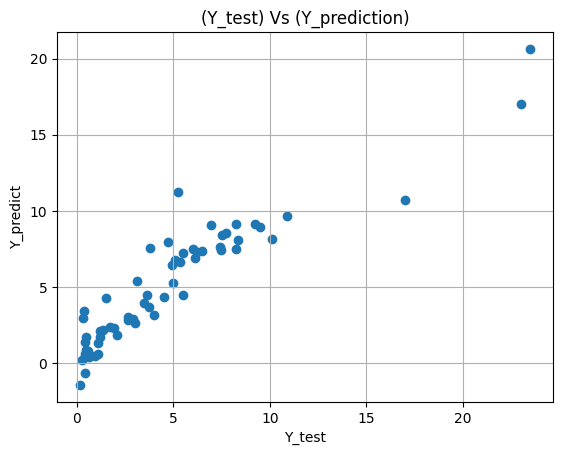

In [14]:
plt.scatter(Y_test,Y_predict)
plt.title('(Y_test) Vs (Y_prediction)')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()

In [15]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} \n Coefficient is equal to : {(coefficient)}')


Intercept is equal to : [4.72946732] 
 Coefficient is equal to : [[-1.02133499  3.70347643 -0.23903854 -0.22368302  1.01204442  0.29864673
  -0.56867879 -0.55637604]]


In [16]:
coefficient_dict = {}
for i in range(0,len(coefficient[0])):

    coefficient_dict[X.columns[i]] = coefficient_dict.get(f'{X.columns[i]}',coefficient[0][i])

coefficient_df = pd.DataFrame(coefficient_dict.items(),columns=['Features','Coefficient'])
coefficient_df.sort_values(by='Coefficient',ascending=False)
coefficient_df

,Features,Coefficient
0,Age,-1.021335
1,Present_Price,3.703476
2,Kms_Driven,-0.239039
3,Owner,-0.223683
4,Fuel_Type_Diesel,1.012044
5,Fuel_Type_Petrol,0.298647
6,Seller_Type_Individual,-0.568679
7,Transmission_Manual,-0.556376


In [17]:
compare_df = pd.DataFrame({'Actual':Y_test.flatten(),'Prediction':Y_predict.flatten()})
compare_df

,Actual,Prediction
0,0.35,2.955343
1,10.11,8.178939
2,4.95,6.454273
3,0.15,-1.424175
4,6.95,9.088899
...,...,...
56,5.50,4.474781
57,9.50,8.973776
58,2.10,1.822946
59,7.40,7.604167


In [18]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))
print('R2 Score: ',metrics.r2_score(Y_test,Y_predict))

Mean absolut Errro:  1.2162256821297066
Mean squared Error:  3.4788039706379013
Root Mean Squared Error:  1.865155213551382
R2 Score:  0.8489813024899067


In [19]:
X_power= pd.DataFrame(working_df,columns=['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
Y_power= working_df['Selling_Price'].values.reshape(-1,1)
power_Present_Price = X_power.Present_Price**2
X_power.insert(2,'Poly_Present_Price',value=power_Present_Price)

encoder_power = OneHotEncoder(drop='first', sparse=False)
X_encoded_power = pd.DataFrame(encoder.fit_transform(X_power[['Fuel_Type', 'Seller_Type', 'Transmission']]), columns=encoder.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission']))
X_power.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)
X_power = pd.concat([X_power, X_encoded_power], axis=1)

X_power_scaled= pd.DataFrame(scaler.fit_transform(X_power),columns=X_power.columns)



X_train_power,X_test_power,Y_train_power,Y_test_power = train_test_split(X_power,Y_power,test_size=0.2,random_state=42)

# Fit a new StandardScaler on the training data


# Train the model
regressor.fit(X_train_power,Y_train_power)

# Now you can prepare your new data point and use scaler_power to scale it

Y_predict = regressor.predict(X_test_power)


d:\other\python\IMT\car price estimation\car-price-estimation-\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


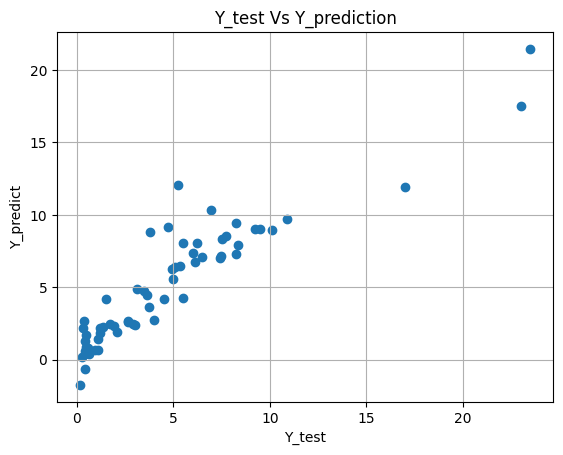

In [20]:
plt.scatter(Y_test_power,Y_predict)
plt.title('Y_test Vs Y_prediction')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()

In [21]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} and Coefficient is equal to : {(coefficient)}')

Intercept is equal to : [2.30703739] and Coefficient is equal to : [[-3.43872069e-01  5.98083162e-01 -2.30562067e-03 -6.86486546e-06
  -1.18956357e+00  1.97599836e+00  6.10058362e-01 -2.28176005e-01
  -9.31985163e-01]]


In [22]:
compare_df = pd.DataFrame({'Actual':Y_test_power.flatten(),'Prediction':Y_predict.flatten()})
compare_df

,Actual,Prediction
0,0.35,2.176577
1,10.11,8.929474
2,4.95,6.294183
3,0.15,-1.739845
4,6.95,10.322966
...,...,...
56,5.50,4.256822
57,9.50,9.057504
58,2.10,1.924531
59,7.40,7.043099


In [23]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test_power,Y_predict))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test_power,Y_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test_power,Y_predict)))
print('R2 Score: ',metrics.r2_score(Y_test_power,Y_predict))

Mean absolut Errro:  1.2614873134235167
Mean squared Error:  3.6397632677084593
Root Mean Squared Error:  1.907816361107237
R2 Score:  0.8419938827902337


In [24]:
X_poly = pd.DataFrame(working_df,columns=['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])

Y_poly= working_df['Selling_Price'].values.reshape(-1,1)

encoder_poly = OneHotEncoder(drop='first', sparse=False)

X_encoded_poly = pd.DataFrame(encoder.fit_transform(X_poly[['Fuel_Type', 'Seller_Type', 'Transmission']]), columns=encoder.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission']))

X_poly.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

X_poly = pd.concat([X_poly, X_encoded_poly], axis=1)

d:\other\python\IMT\car price estimation\car-price-estimation-\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
poly = PolynomialFeatures(degree=2)

polynomial_X_poly = pd.DataFrame(poly.fit_transform(X_poly))

scaled_polynomial_X_poly = pd.DataFrame(scaler.fit_transform(polynomial_X_poly),columns=polynomial_X_poly.columns)

X_train_poly,X_test_poly,Y_train_poly,Y_test_poly = train_test_split(scaled_polynomial_X_poly,Y_poly,test_size=0.2,random_state=42)

regressor.fit(X_train_poly,Y_train_poly)

Y_predict_poly = regressor.predict(X_test_poly)

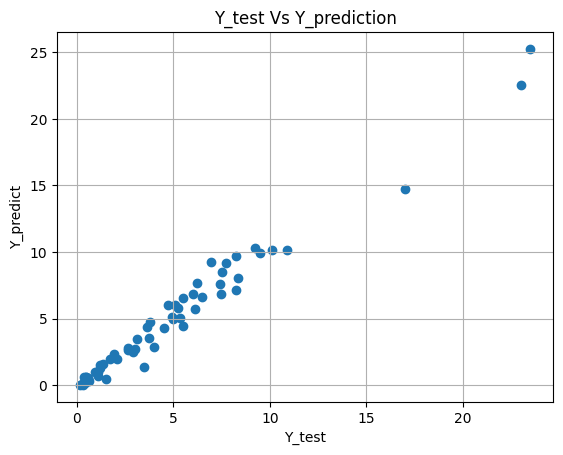

In [26]:
plt.scatter(Y_test_poly,Y_predict_poly)
plt.title('Y_test Vs Y_prediction')
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.grid()
plt.show()


In [27]:
intercept = regressor.intercept_
coefficient = regressor.coef_
print(f'Intercept is equal to : {(intercept)} and Coefficient is equal to : {(coefficient)}')


Intercept is equal to : [4.67607751] and Coefficient is equal to : [[-1.36594746e+12 -8.53632411e-03  4.84036395e+00 -2.45304084e-01
   6.80541772e-01 -3.59790814e-01  1.67923474e-01 -3.72206530e-01
  -1.04975177e-01  3.77980799e-01 -3.31284248e+00  5.50273656e-01
   1.79158893e-02 -5.74662726e-01 -2.42681325e-01 -1.07095287e-01
  -8.96254722e-02 -5.29709448e-01 -1.19924904e+00 -1.75374027e+00
   3.93084925e+00  1.17825197e+00  5.03324441e-01  3.65900239e-01
   3.58141919e-01 -1.55980471e-01  1.20433787e-01 -5.47061987e-01
  -1.45626208e-01  2.67825857e-01  1.54937347e+00  2.09769035e-01
   6.48091661e-01 -5.60491766e-01 -9.51273418e-01 -3.59790814e-01
   0.00000000e+00 -1.15358229e-01  2.40594156e-01  1.67923474e-01
  -3.59091577e-01 -4.35857295e-01 -3.72206530e-01  7.83028656e-01
  -1.04975177e-01]]


In [28]:
compare_df = pd.DataFrame({'Actual':Y_test_poly.flatten(),'Prediction':Y_predict_poly.flatten()})
compare_df


,Actual,Prediction
0,0.35,0.014761
1,10.11,10.128333
2,4.95,5.080806
3,0.15,0.040105
4,6.95,9.232432
...,...,...
56,5.50,4.451482
57,9.50,9.917636
58,2.10,1.954657
59,7.40,7.593660


In [29]:
print('Mean absolut Errro: ' , metrics.mean_absolute_error(Y_test_poly,Y_predict_poly))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test_poly,Y_predict_poly))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test_poly,Y_predict_poly)))
print('R2 Score: ',metrics.r2_score(Y_test_poly,Y_predict_poly))

Mean absolut Errro:  0.5691967926090794
Mean squared Error:  0.657184393061795
Root Mean Squared Error:  0.8106691020766703
R2 Score:  0.9714709043965031


In [30]:
regressor.fit(scaled_polynomial_X_poly,Y_poly)

LinearRegression()

In [31]:
# Create a DataFrame for the new data point
new_data = pd.DataFrame({
    'Age': [10],
    'Present_Price': [11.23],
    'Kms_Driven': [42000],
    'Fuel_Type': ['Petrol'],
    'Seller_Type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [1]
})

# Encode the categorical variables
new_data_encoded = pd.DataFrame(encoder.transform(new_data[['Fuel_Type', 'Seller_Type', 'Transmission']]), columns=encoder.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission']))
new_data.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)
new_data = pd.concat([new_data, new_data_encoded], axis=1)


new_data_poly = poly.transform(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_data_poly)


# Predict
prediction = regressor.predict(new_data_scaled)

print("Predicted selling price:", prediction)


Predicted selling price: [[0.98530601]]
